In [12]:
# Import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [7]:
path = r'C:\Users\Lapis Lazuli\Documents\Project 6\Data'

In [8]:
# Import the dataset

df = pd.read_pickle(os.path.join(path, 'Rent Prices.pkl'))

In [9]:
# Check the dataset

df.head(10)

,City Code,City,Metro,County,State,Population Rank,Month/Year,Rent Price
0,6181,New York,New York,Queens,NY,1,April 2012,1792
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,April 2012,2183
2,17426,Chicago,Chicago,Cook,IL,3,April 2012,1494
3,39051,Houston,Houston,Harris,TX,4,April 2012,1200
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,April 2012,1091
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,April 2012,1034
6,18959,Las Vegas,Las Vegas,Clark,NV,7,April 2012,1127
7,6915,San Antonio,San Antonio,Bexar,TX,8,April 2012,1045
8,54296,San Diego,San Diego,San Diego,CA,9,April 2012,2006
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,April 2012,1104


In [10]:
df.shape

(29000, 8)

In [13]:
# Check for inconsistencies

df.isnull().sum()

City Code          0
City               0
Metro              0
County             0
State              0
Population Rank    0
Month/Year         0
Rent Price         0
dtype: int64

In [14]:
dups = df.duplicated()

In [15]:
dups.shape

(29000,)

In [16]:
df['Rent Price'].mean()

1499.9313448275861

In [17]:
df['Rent Price'].median()

1347.0

In [18]:
df['Rent Price'].max()

4560

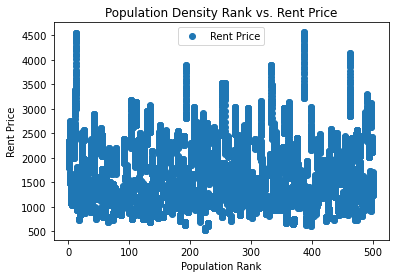

In [19]:
# Check the relationship between Population Rank and Rent Price

df.plot(x = 'Population Rank', y='Rent Price',style='o')
plt.title('Population Density Rank vs. Rent Price')  
plt.xlabel('Population Rank')  
plt.ylabel('Rent Price')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df['Population Rank'].values.reshape(-1,1)
y = df['Rent Price'].values.reshape(-1,1)

In [21]:
x

array([[  1],
       [  2],
       [  3],
       ...,
       [499],
       [500],
       [501]], dtype=int64)

In [22]:
y

array([[1792],
       [2183],
       [1494],
       ...,
       [2419],
       [1480],
       [1706]], dtype=int64)

### Hypothesis: Higher density cities will have a higher rent price

In [23]:
# Split data into a training set and a test set.

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
# Create a regression object.

regression = LinearRegression()

In [25]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

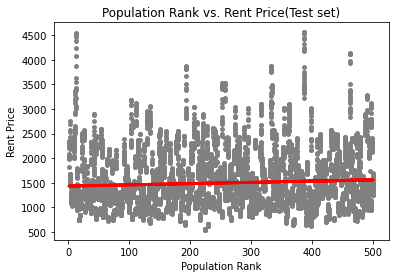

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population Rank vs. Rent Price(Test set)')
plot_test.xlabel('Population Rank')
plot_test.ylabel('Rent Price')
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25183908]]
Mean squared error:  329201.30799124774
R2 score:  0.007081482877019596


### A positive slope in this case indicates that the lower population ranks actually have a higher rent price

In [30]:
y_predicted

array([[1530.22718851],
       [1541.55994703],
       [1531.4863839 ],
       ...,
       [1460.21592475],
       [1510.08006225],
       [1552.64086648]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4528,1530.227189
1,1759,1541.559947
2,1836,1531.486384
3,886,1515.620522
4,1213,1481.622246
5,1198,1526.701441
6,1113,1502.021212
7,1201,1441.076155
8,1777,1539.293395
9,1114,1504.791442


In [32]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25183908]]
Mean squared error:  312599.97583301156
R2 score:  0.004220017667029952


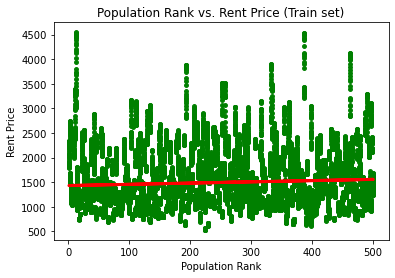

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Population Rank vs. Rent Price (Train set)')
plot_test.xlabel('Population Rank')
plot_test.ylabel('Rent Price')
plot_test.show()

## Interpretation

### My original hypothesis predicted that higher density population areas will have higher rent prices. The prediction models turned out that the inverse is true, but the strength of the correlation is weak. The r2 score also indicates that the model does not explain any variability of the rent price, so the model is not a good fit for this data. This could also be because the data is so scattered with no real correlation